In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df=pd.read_csv('keyword_datset.csv')

In [4]:
df.head()

,Unnamed: 0,Title,keywords
0,0,Data Analyst,"['data analyst', 'data', 'new data extract req..."
1,1,Data Analyst,"['models', 'business data requirements', 'comp..."
2,2,Data Analyst,"['data analyst', 'data collection', 'analysis'..."
3,3,Data Analyst,"['microsoft excel', 'jr research analyst', 're..."
4,4,Data Analyst,"['data analyst', 'interpreting', 'data', 'data..."


In [6]:
x = df.iloc[:,-1].values
y = df.iloc[:,1].values
x,y

(array(["['data analyst', 'data', 'new data extract requirements', 'advanced skills', 'data analysis', 'data mapping', 'data modeling', 'data lakes', 'analytics data analytics', 'aws quicksight redshift data migration', 'sql', 'etl scripting', 'integration', 'rest apis', 'nodejs aws lambdaapi gateway detailed duties', 'source data', 'wellprepared datasets', 'development', 'dashboards', 'analysis', 'statistical models', 'handson development', 'analytical solutions', 'available data', 'analytical needs', 'statistical findings', 'appropriate algorithms', 'data structures', 'analyst', 'programming languages', 'graphql', 'nodejs aws lambdaapi gateway experience', 'data mining', 'quantitative analysis experience', 'machine learning algorithms', 'associated data', 'analytical problem solving datadrivenmetrics driven job type']",
        "['models', 'business data requirements', 'complete reporting analytics solutions', 'extensive sql query skills', 'tableau dashboard reporting', 'adhoc analyt

In [66]:
type(x)

numpy.ndarray

In [68]:
x[0]

"['data analyst', 'data', 'new data extract requirements', 'advanced skills', 'data analysis', 'data mapping', 'data modeling', 'data lakes', 'analytics data analytics', 'aws quicksight redshift data migration', 'sql', 'etl scripting', 'integration', 'rest apis', 'nodejs aws lambdaapi gateway detailed duties', 'source data', 'wellprepared datasets', 'development', 'dashboards', 'analysis', 'statistical models', 'handson development', 'analytical solutions', 'available data', 'analytical needs', 'statistical findings', 'appropriate algorithms', 'data structures', 'analyst', 'programming languages', 'graphql', 'nodejs aws lambdaapi gateway experience', 'data mining', 'quantitative analysis experience', 'machine learning algorithms', 'associated data', 'analytical problem solving datadrivenmetrics driven job type']"

In [67]:
x.shape

(75,)

In [5]:
# skillset=df['keywords']
# pro=skillset.str.lower()
# pro=pro.str.replace('\s+','')
# pro=pro.str.replace(r'[^\w\d\s]',' ')
# pro=pro.str.replace(r'\s+',' ')
# pro=pro.str.replace(r'^\s+|\s+?$','')
# print(pro)

In [9]:
vector=CountVectorizer()

In [7]:
x

array(["['data analyst', 'data', 'new data extract requirements', 'advanced skills', 'data analysis', 'data mapping', 'data modeling', 'data lakes', 'analytics data analytics', 'aws quicksight redshift data migration', 'sql', 'etl scripting', 'integration', 'rest apis', 'nodejs aws lambdaapi gateway detailed duties', 'source data', 'wellprepared datasets', 'development', 'dashboards', 'analysis', 'statistical models', 'handson development', 'analytical solutions', 'available data', 'analytical needs', 'statistical findings', 'appropriate algorithms', 'data structures', 'analyst', 'programming languages', 'graphql', 'nodejs aws lambdaapi gateway experience', 'data mining', 'quantitative analysis experience', 'machine learning algorithms', 'associated data', 'analytical problem solving datadrivenmetrics driven job type']",
       "['models', 'business data requirements', 'complete reporting analytics solutions', 'extensive sql query skills', 'tableau dashboard reporting', 'adhoc analytic

In [10]:
train_data_features=vector.fit_transform(x)


In [11]:
train_data_features

<75x803 sparse matrix of type '<class 'numpy.int64'>'
	with 2500 stored elements in Compressed Sparse Row format>

In [12]:
vocab=vector.get_feature_names()
print(vocab)

['abilities', 'ability', 'academic', 'access', 'accuracy', 'acquisition', 'active', 'activities', 'ad', 'adapts', 'additional', 'addressable', 'adhoc', 'administers', 'administration', 'administrative', 'administrator', 'administrators', 'adoption', 'advanced', 'advocates', 'agile', 'ai', 'aids', 'algorithm', 'algorithms', 'amazon', 'analyses', 'analysis', 'analyst', 'analysts', 'analytic', 'analytical', 'analytics', 'andor', 'angular', 'angularjs', 'annotation', 'api', 'apis', 'app', 'appealing', 'application', 'applications', 'applied', 'approach', 'approaches', 'appropriate', 'apps', 'architect', 'architected', 'architects', 'architectural', 'architecture', 'architectures', 'artificial', 'asap', 'aspects', 'assigned', 'assignment', 'associated', 'attribution', 'audits', 'augmentation', 'automate', 'automated', 'automatic', 'automation', 'availability', 'available', 'aws', 'azure', 'back', 'backend', 'background', 'backup', 'backups', 'based', 'bases', 'bash', 'basic', 'behavior', 'b

d:\Job_prediction\job_prediction\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data_features,y)

In [15]:
y_test

array(['Database Administrator', 'Database Administrator', 'Data Analyst',
       'machine learning engineer', 'Full Stack Developer',
       'Cloud Engineer', 'Database Administrator',
       'machine learning engineer', 'Cloud Engineer',
       'Database Administrator', 'Database Administrator', 'Data Analyst',
       'Full Stack Developer', 'Full Stack Developer', 'Cloud Engineer',
       'Cloud Engineer', 'Full Stack Developer',
       'machine learning engineer', 'Database Administrator'],
      dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [32]:
y_test

array([2, 2, 1, 4, 3, 0, 2, 4, 0, 2, 2, 1, 3, 3, 0, 0, 3, 4, 2])

In [33]:
le.classes_

array(['Cloud Engineer', 'Data Analyst', 'Database Administrator',
       'Full Stack Developer', 'machine learning engineer'], dtype=object)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
y_pred=model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.6842105263157895

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5263157894736842


In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7894736842105263


In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8421052631578947


In [40]:
x_train.shape[1]

803

In [44]:
from keras.models import Sequential
from keras import layers

input_dim = x_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                8040      
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
Total params: 8,095
Trainable params: 8,095
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(x_train, y_train,epochs=100,validation_data=(x_test, y_test),batch_size=10)

Epoch 1/100


d:\Job_prediction\job_prediction\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


6/6 [==============================] - 3s 121ms/step - loss: 1.6405 - accuracy: 0.0714 - val_loss: 1.5965 - val_accuracy: 0.2105
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1.5226 - accuracy: 0.2143 - val_loss: 1.5537 - val_accuracy: 0.2632
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 1.4499 - accuracy: 0.3929 - val_loss: 1.5155 - val_accuracy: 0.3158
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 1.3804 - accuracy: 0.5179 - val_loss: 1.4854 - val_accuracy: 0.3158
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 1.3207 - accuracy: 0.5179 - val_loss: 1.4617 - val_accuracy: 0.4211
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 1.2572 - accuracy: 0.5893 - val_loss: 1.4399 - val_accuracy: 0.4737
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 1.1976 - accuracy: 0.6607 - val_loss: 1.4197 - val_accuracy: 0.5263
Epoch 8/100
6/6 [==============

In [46]:
from keras.backend import clear_session
clear_session()

In [47]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8947


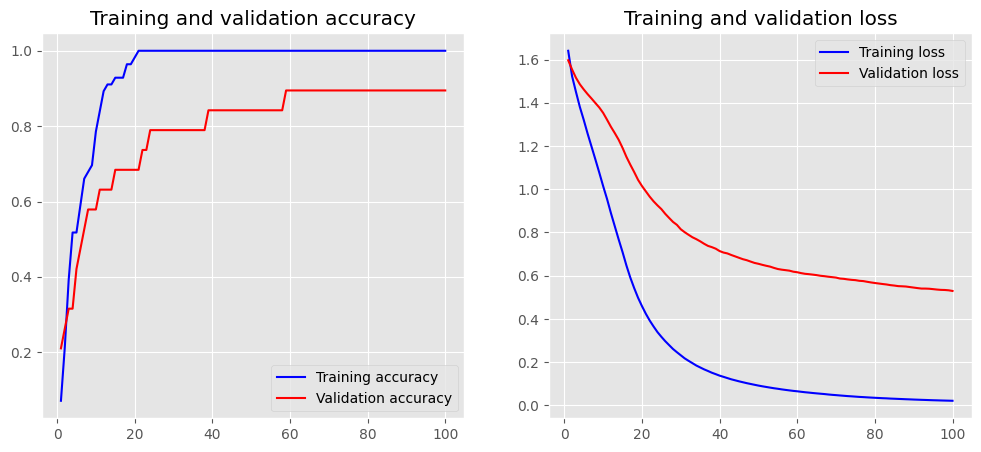

In [53]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [61]:
# saving vectorizer and tokenizer
import pickle

pickle.dump(vector, open("vectorizer.pickle", "wb"))
pickle.dump(le,open('LabelEncoder.pickle','wb'))


In [63]:
# saving model
model.save('job_predictor.h5')


In [ ]:
le.inverse_transform

In [64]:
text = '''Charger Logistics is a world class asset-based carrier. We specialize in delivering assets, on time and on budget. With the diverse fleet of equipment, we can handle a range of freight, including dedicated loads, specialized hauls, temperature-controlled goods and HAZMAT cargo.

Charger logistics invests time and support into its employees to provide them with the room to learn and grow their expertise and work their way up. We are entrepreneurial-minded organization that welcomes and support individual idea and strategies. We are currently expanding and looking to add a motivated individual to our team based out of our Brampton office.

Responsibilities:

Collaborate with business partners to develop innovative solutions to meet objectives utilizing cutting edge techniques and tools.
Effectively communicate the analytics approach and how it will meet and address objectives to business partners.
Advocate and educate on the value of data-driven decision making; focus on the “how and why” of solutioning.
Lead analytic approaches; integrate solutions collaboratively into applications and tools with data engineers, business leads, analysts and developers.
Create repeatable, interpretable, dynamic and scalable models that are seamlessly incorporated into analytic data products.
Engineer features by using your business acumen to find new ways to combine disparate internal and external data sources.
Share your passion for Data Science with the broader enterprise community; identify and develop long-term processes, frameworks, tools, methods and standards.
Collaborate, coach, and learn with a growing team of experienced Data Scientists.
Stay connected with external sources of ideas through conferences and community engagements
Requrements:

Bachelors Degree in Data Science, Computer Science, or related field.
4+ years of Data Science and Machine Learning experience required.
Experience working with AWS tools like Sage maker is a plus.
Proficiency in Python or R. Ability to write complex SQL queries.
Proficiency with Machine Learning concepts and modeling techniques to solve problems such as clustering, classification, regression, anomaly detection, simulation and optimization problems on large scale data sets.
Ability to implement ML best practices for the entire Data Science lifecycle.
Experience with microservices and deployment of ML models.
Experience on Cloud Data Warehouses (Snowflake Data Cloud, Google BigQuery, DataBricks Lakehouse, Azure Synapse).
Artificial Intelligence / Machine Learning (Amazon Sagemaker, Azure ML Studio)
Streaming Data Ingestion and Analytics (Amazon Kinesis, Apache Kafka)

Ability to apply various analytical models to business use cases (NLP, Supervised, Un-Supervised, Neural Nets, etc.).
Exceptional communication and collaboration skills to understand business partner needs and deliver solutions
Bias for action, with the ability to deliver outstanding results through task prioritization and time management.
'''

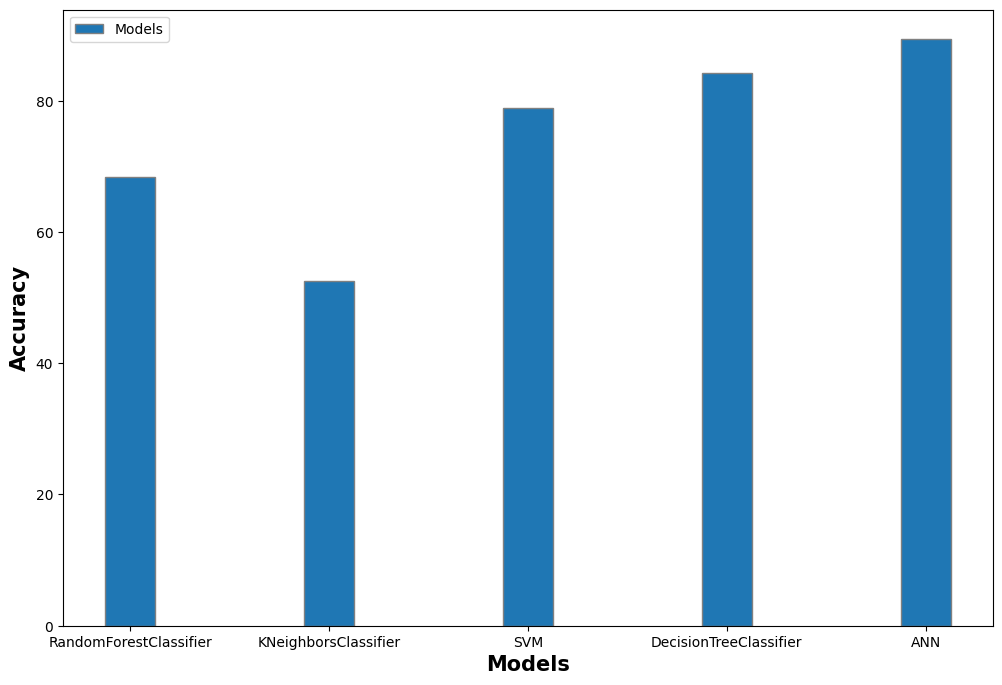

In [7]:
import matplotlib.pyplot as plt

m = ['RandomForestClassifier',
'KNeighborsClassifier','SVM',
'DecisionTreeClassifier',
'ANN']
acc = [68.4,52.6,78.9,84.2,89.4]

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.bar(m, acc, width = barWidth,
        edgecolor ='grey',label = 'Models')
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)

plt.legend()
plt.show()